# Data Analysis on Olympics Data


# Inspiration: 
I was reading an article(https://nuunlife.com/blogs/news/a-timeline-of-women-in-the-olympics): Women in Olympics and there were so many fun facts that the author shared. I  was very much intruiged by the study and wanted to do analysis on the olympics data myself. Also I have always been interested in sports, thus, it was so much fun to treat the data and find patterns and anomolies.


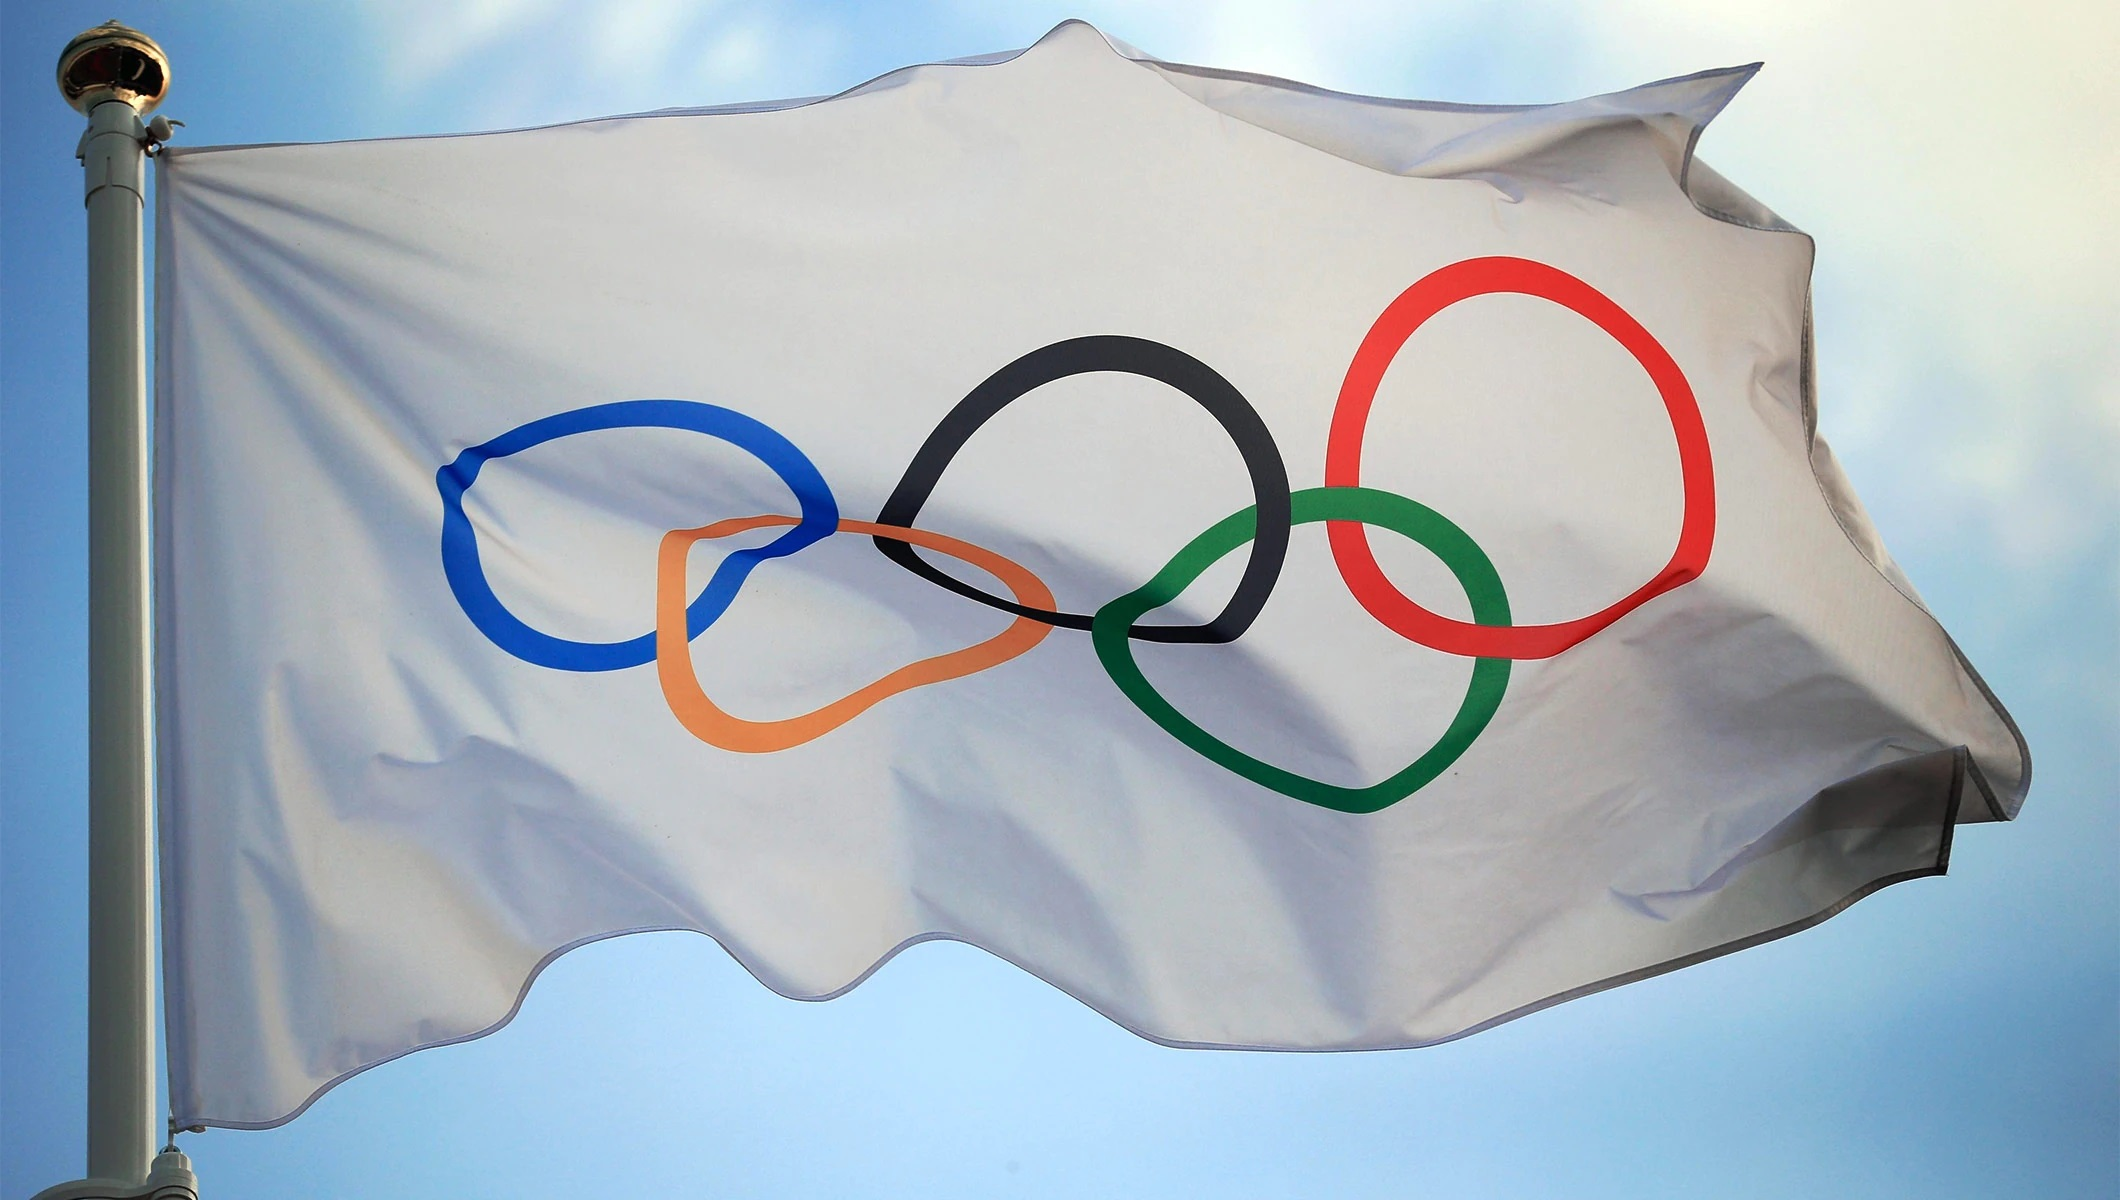

## About the data 

# Source: Kaggle 
It is a dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

The data have been scraped from www.sports-reference.com in May 2018.

Content

The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

    ID - Unique number for each athlete;
    Name - Athlete's name;
    Sex - M or F;
    Age - Integer;
    Height - In centimeters;
    Weight - In kilograms;
    Team - Team name;
    NOC - National Olympic Committee 3-letter code;
    Games - Year and season;
    Year - Integer;
    Season - Summer or Winter;
    City - Host city;
    Sport - Sport;
    Event - Event;
    Medal - Gold, Silver, Bronze, or NA.


# Index

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# Import the dataset

In [2]:
#importing the dataset
olympics_data = pd.read_csv('data/athlete_events.csv')

In [3]:
#displaying the 5 rows of the dataset
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Data Info

In [4]:
olympics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### The dataset has 271116 rows and 15 columns.

In [5]:
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

There are a lot of missing values in columns like Age, Height, Weight and Medal.
Though we can figure out that all the athletes that have participated in the games have not won the medal, so missing values in this column is justified. 

However, in the other columns like Age, Height and Weight , we have to either drop or fill these missing values.

In [6]:
olympics_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


from the above results, we can see that 
#### The youngest athlete to have participated in Olympics was at the age of 10 and oldest was at the age of 97.
#### The minimum height of the athlete was 127 cm and maximum height was 226 cm 
#### The minimum weight of the athlete was 25 kg and Maximum weight of the athlete was 214 kg .

In [7]:
olympics_data.describe(include =['object']).transpose()

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,39783,3,Gold,13372


### Initial Data Exploration 
From the above results, we can have an overview about the dataset.

#### The name of an athlete that appears the most is Robert Tait McKenzie, about 58 times. Verified this information on wikipedia as Mckenzie participated in every Olympic Summer Games from 1896 in Athens to the 1932 L.A. Olympics(https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwj-5vPw2vP4AhVrlmoFHTeTDTEQFnoECCAQAQ&url=https%3A%2F%2Fwww.wikihero.net%2Fen%2FR._Tait_McKenzie&usg=AOvVaw1lCRMLUtzL22BKpzJQirVj)

#### Out of the two genders, male hasdominated the Olympics

#### The athletes from United States have participated the most in the Olympics till now.

#### Out of 39783 medals awarded, 13372 were gold medals.

#### Men's Football as the game and London as city appeared the most in the data.

# NOC regions data set 

In [8]:
# importing the dataset 
noc_regions= pd.read_csv('data/noc_regions.csv')

In [9]:
# displaying the top rows 
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Joining the two datasets 

In [10]:
# merging the two dataframes 
df = pd.merge(olympics_data, noc_regions, on='NOC', how='left')

In [11]:
# displaying the merged dataframe
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


# EXPLORATORY DATA ANALYSIS 

In [12]:
# filtering the data to only for gold medals 
# making a new dataframe containing gold medals only

gold_df = df[(df.Medal == 'Gold')]
gold_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [13]:
# checking for missing vales 

gold_df.isna().sum()

ID            0
Name          0
Sex           0
Age         148
Height     2833
Weight     3118
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

We can see there are missing values in columns like Age, Height and Weight. 
lets see the missing data 

In [14]:
gold_miss_df = gold_df[gold_df.Age.isna()]
gold_miss_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2170,1208,Ioannis Agrimis,M,NaN,NaN,NaN,"Large boat, Central Naval Prep School ""Poros""-1",GRE,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's 17-Man Naval Rowing Boats,Gold,Greece,NaN
4015,2316,A. Albert,M,NaN,NaN,NaN,Union des Socits Franais de Sports Athletiques,FRA,1900 Summer,1900,Summer,Paris,Rugby,Rugby Men's Rugby,Gold,France,NaN
4112,2367,mile Albrecht,M,NaN,NaN,NaN,Switzerland,SUI,1924 Summer,1924,Summer,Paris,Rowing,Rowing Men's Coxed Fours,Gold,Switzerland,NaN
4821,2756,Georgios Aliprantis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,Greece,NaN
7498,4189,Nikolaos Andriakopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,Greece,NaN


In [15]:
# lets check the count of missing values in all three columns Age, Height and Weight 
gold_miss_df.isna().sum()

ID          0
Name        0
Sex         0
Age       148
Height    141
Weight    142
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
region      0
notes     148
dtype: int64

As we can see the count of missing values is same in all three columns. We can either fill these columns or we can drop them.
Lets try to drop these rows first and check the distribution of Age, Height and Weight among the gold medals.

### Dropping the missing values in gold_df 



In [16]:
# using dropna to drop the nan values in columns Age, Height and Weight 
# defining a subset to drop the missing values only in these columns 
# else if do not define the subset, it will drop 10024 more rows as "notes" column have missing values 
# we can just drop this column as well


gold_df = gold_df.dropna(subset=['Age', 'Height', 'Weight'])



Another way of filtering the nan values from the 3 columns `Age`, `Height` and `Weight` is using the numpy function isfinite

The code will look like 


gold_df = gold_df[np.isfinite(gold_df['Age'])]

In [17]:
# lets check for missing values 
gold_df.isna().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     10024
dtype: int64

In [18]:
gold_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


### Question1 : Who won the most gold medals???

In [19]:
gold_df.Name.value_counts().reset_index(name = "Medal count").head(5)

,index,Medal count
0,"Michael Fred Phelps, II",23
1,"Raymond Clarence ""Ray"" Ewry",10
2,Mark Andrew Spitz,9
3,Larysa Semenivna Latynina (Diriy-),9
4,"Frederick Carlton ""Carl"" Lewis",9


##### Micheal Fred Phelps, II have won the maximum gold medals in the Olympics followed by Raymond Clarence "Ray" Ewry who won 10.

### Question 2: Top 5 : male and female athletes to won most gold medals?

In [20]:
m= gold_df["Name"].where(gold_df["Sex"] == "M").value_counts().reset_index(name = "Medal Count").head(5)
m.head()

,index,Medal Count
0,"Michael Fred Phelps, II",23
1,"Raymond Clarence ""Ray"" Ewry",10
2,"Frederick Carlton ""Carl"" Lewis",9
3,Mark Andrew Spitz,9
4,Paavo Johannes Nurmi,9


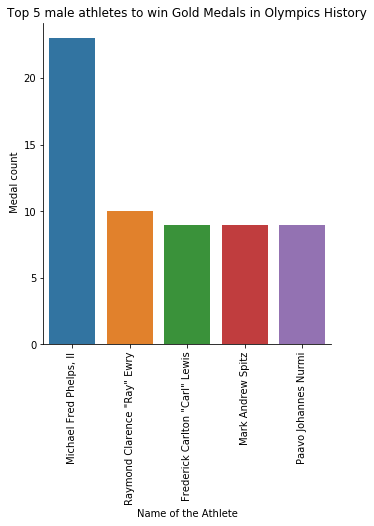

In [21]:
# using seaborn catplot to plot this table
sns.catplot( x = 'index' , y = 'Medal Count', data = m, kind = 'bar')


plt.ylabel(" Medal count")
plt.xlabel("Name of the Athlete")
plt.xticks(rotation = 90)
plt.title( "Top 5 male athletes to win Gold Medals in Olympics History")


plt.show()

In [22]:
f= gold_df["Name"].where(gold_df["Sex"] == "F").value_counts().reset_index(name = "Medal Count").head(5)
f.head()

,index,Medal Count
0,Larysa Semenivna Latynina (Diriy-),9
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
2,Birgit Fischer-Schmidt,8
3,Vra slavsk (-Odloilov),7
4,Allyson Michelle Felix,6


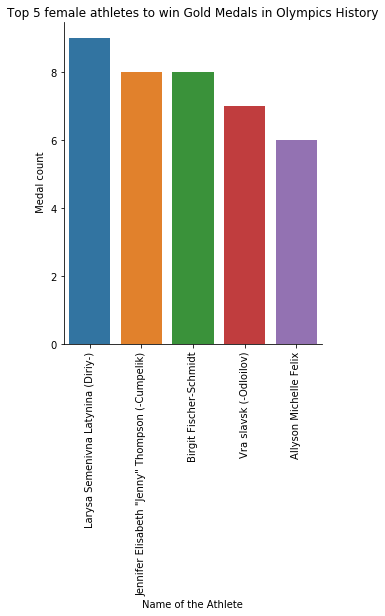

In [23]:
# using seaborn catplot to plot this table
ax = sns.catplot( x = 'index' , y = 'Medal Count', data = f, kind = 'bar')


plt.ylabel(" Medal count")
plt.xlabel("Name of the Athlete")
plt.xticks(rotation = 90)
plt.title( "Top 5 female athletes to win Gold Medals in Olympics History")


plt.show()


### Question 3: Which country won the maximum gold medals?

In [24]:
gold_df["region"].value_counts().reset_index(name = "Medal count").head(5)

,index,Medal count
0,USA,2115
1,Russia,1465
2,Germany,1102
3,Canada,362
4,China,351


United States won the maximum gold medals followed by Soviet Union.

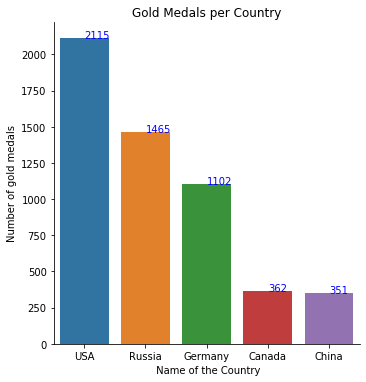

In [134]:
# lets plot this 

# saving the above dataframe in a new table called tot_gold
tot_gold = gold_df["region"].value_counts().reset_index(name = "Medal count").head(5)
 
# calculating values to display on top of each bar
a = gold_df["region"].value_counts().head(5).values
# using seaborn catplot to plot this table
sns.catplot( x = 'index' , y = 'Medal count', data = tot_gold, kind = 'bar')


plt.xlabel(" Name of the Country")
plt.ylabel("Number of gold medals")
plt.title( "Gold Medals per Country")
for index, value in enumerate(a):
    plt.text(index, value, str(value),color='blue',size=10)
plt.show()

### Question 4: Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count?

In [26]:
gold_df["region"].nunique()


96

###### The idea behind calculating the unique values so that I can calculate the total number of rows that will come for this table. However this reference is just for my understanding, which means not all countries which won gold in Summer is same as who won gold in Winter.

In [27]:
season = gold_df.groupby(by=["Season"]).region.value_counts().reset_index(name = "medal count").head(192)
season.head(192)

,Season,region,medal count
0,Summer,USA,1981
1,Summer,Russia,1121
2,Summer,Germany,890
3,Summer,China,335
4,Summer,Australia,314
...,...,...,...
120,Winter,Slovenia,2
121,Winter,Bulgaria,1
122,Winter,Kazakhstan,1
123,Winter,Spain,1


In [28]:
#plt.tight_layout()
#sns.catplot(data=season, kind="bar",x="region", y="medal count", hue="Season")


#plt.title("Difference in Gold medal count of Summer and Winter Olympics ")

In [29]:
# making a dataframe with the summer season only 
summer = season.sort_values(by = "medal count",ascending = False).loc[season["Season"]== "Summer"]
summer.head()

,Season,region,medal count
0,Summer,USA,1981
1,Summer,Russia,1121
2,Summer,Germany,890
3,Summer,China,335
4,Summer,Australia,314


In [30]:
# making a dataframe with winter season only 
winter  = season.sort_values(by = "medal count",ascending = False).loc[season["Season"]== "Winter"]
winter.head()

,Season,region,medal count
95,Winter,Russia,344
96,Winter,Canada,247
97,Winter,Germany,212
98,Winter,USA,134
99,Winter,Norway,110


If we see the above two tables here, we can clearly see that the top 5 countries who won the most gold medals in summer olympics is not identical to ones who won in winter Olympics, however, the countries like USA, Russia and Germany makes their mark in both.

It is quite clear that Canada appears on the list as this country enjoys majority of the weather as Snowy winters, so people seems to enjoy a lot of winter sports.  

lets calculate the difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count.
Using the formula 
(Summer Gold Count - Winter Gold Count) / Total Gold Count 
  

In [31]:
# lets merge the two dataframes b
diff = pd.merge(summer , winter, on= 'region')
diff

,Season_x,region,medal count_x,Season_y,medal count_y
0,Summer,USA,1981,Winter,134
1,Summer,Russia,1121,Winter,344
2,Summer,Germany,890,Winter,212
3,Summer,China,335,Winter,16
4,Summer,Australia,314,Winter,5
5,Summer,UK,311,Winter,19
6,Summer,Italy,262,Winter,53
7,Summer,France,256,Winter,29
8,Summer,Japan,210,Winter,16
9,Summer,Netherlands,177,Winter,41


Here to keep an eye on that this is only showing the data where the countries have won at least one gold both in Summer and Winter Olympics.

In [32]:
diff['Medal count difference'] = diff['medal count_x'] - diff['medal count_y']
diff['Relative medal count difference'] = diff['Medal count difference']/(diff['medal count_x'] + diff['medal count_y'])

In [33]:
diff.head()

,Season_x,region,medal count_x,Season_y,medal count_y,Medal count difference,Relative medal count difference
0,Summer,USA,1981,Winter,134,1847,0.873286
1,Summer,Russia,1121,Winter,344,777,0.530375
2,Summer,Germany,890,Winter,212,678,0.615245
3,Summer,China,335,Winter,16,319,0.908832
4,Summer,Australia,314,Winter,5,309,0.968652


In [34]:
# lets find out which country has the highest relative gold medal count difference 
diff.sort_values(by = 'Relative medal count difference', ascending = False)

,Season_x,region,medal count_x,Season_y,medal count_y,Medal count difference,Relative medal count difference
15,Summer,Spain,82,Winter,1,81,0.975904
4,Summer,Australia,314,Winter,5,309,0.968652
18,Summer,Bulgaria,52,Winter,1,51,0.962264
3,Summer,China,335,Winter,16,319,0.908832
22,Summer,Kazakhstan,19,Winter,1,18,0.900000
13,Summer,Poland,108,Winter,6,102,0.894737
5,Summer,UK,311,Winter,19,292,0.884848
0,Summer,USA,1981,Winter,134,1847,0.873286
8,Summer,Japan,210,Winter,16,194,0.858407
19,Summer,Croatia,49,Winter,4,45,0.849057


In [35]:
diff1 = diff[['region','medal count_x','medal count_y']]
diff1

,region,medal count_x,medal count_y
0,USA,1981,134
1,Russia,1121,344
2,Germany,890,212
3,China,335,16
4,Australia,314,5
5,UK,311,19
6,Italy,262,53
7,France,256,29
8,Japan,210,16
9,Netherlands,177,41


In [36]:
diff1. rename( columns={"medal count_x":"Summer_medal_count", "medal count_y":"Winter_medal_count"} ,inplace=True)

C:\Users\16476\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'Difference in gold medals won in SUMMER and WINTER Olympics')

<Figure size 720x720 with 0 Axes>

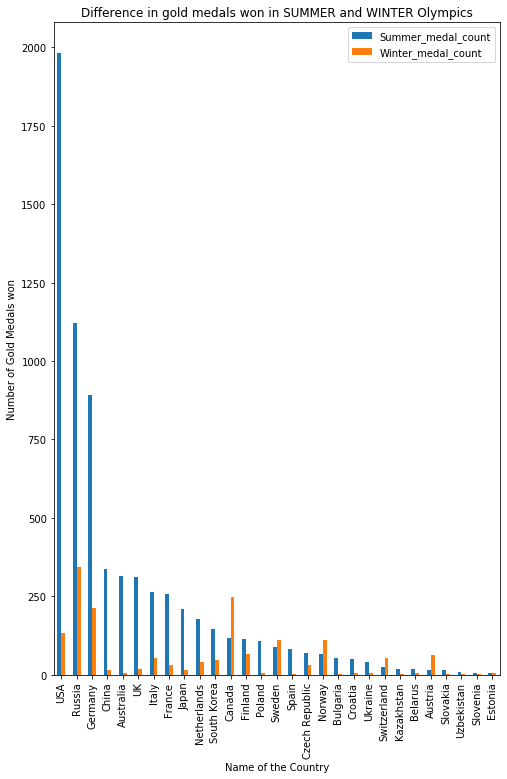

In [139]:
# lets try to plot this visualisation 

plt.figure(figsize = (10,10))

diff1.plot(x="region", y=["Summer_medal_count", "Winter_medal_count"], kind="bar")
plt.xlabel("Name of the Country")
plt.ylabel("Number of Gold Medals won")
plt.title("Difference in gold medals won in SUMMER and WINTER Olympics")

Seems out that Spain it is. Australia being the second in terms of how well it performs in summer Olympics and not in Winter.  https://en.wikipedia.org/wiki/Australia_at_the_Olympics, this is backed by wikipedia as well, as i checked their medal tally and journey in winter olympics.

### Question 5: Who was the youngest and oldest player to have won a gold in olympics ? In which sport? and from which country?

In [38]:
# sorting the dataframe by descending order of column Age 
gold_df[["Name","Age","Height","Weight","Team","Games","Year","Event"]].sort_values(by = "Age", ascending = False).head(5)

,Name,Age,Height,Weight,Team,Games,Year,Event
173097,"William Herbert ""Bill"" Northam",59.0,183.0,81.0,Barrenjoey,1964 Summer,1964,Sailing Mixed 5.5 metres
222156,"Nicholas David ""Nick"" Skelton",58.0,175.0,76.0,Great Britain,2016 Summer,2016,"Equestrianism Mixed Jumping, Individual"
169083,Josef Carl Peter Neckermann,56.0,183.0,65.0,West Germany,1968 Summer,1968,"Equestrianism Mixed Dressage, Team"
13396,"Nikolaus ""Klaus"" Balkenhol",56.0,178.0,83.0,Germany,1996 Summer,1996,"Equestrianism Mixed Dressage, Team"
222155,"Nicholas David ""Nick"" Skelton",54.0,175.0,76.0,Great Britain,2012 Summer,2012,"Equestrianism Mixed Jumping, Team"


In [39]:
# sorting the dataframe by ascending order of Age 
gold_df[["Name","Age","Height","Weight","Team","Games","Year","Event"]].sort_values(by = "Age").head(5)

,Name,Age,Height,Weight,Team,Games,Year,Event
73581,Fu Mingxia,13.0,160.0,48.0,China,1992 Summer,1992,Diving Women's Platform
119277,Kim Yun-Mi,13.0,160.0,48.0,South Korea,1994 Winter,1994,"Short Track Speed Skating Women's 3,000 metres..."
52010,Donna Elizabeth de Varona (-Pinto),13.0,168.0,61.0,United States,1960 Summer,1960,Swimming Women's 4 x 100 metres Freestyle Relay
268602,Klaus Zerta,13.0,165.0,48.0,Germany,1960 Summer,1960,Rowing Men's Coxed Pairs
43773,Nadia Elena Comneci (-Conner),14.0,162.0,45.0,Romania,1976 Summer,1976,Gymnastics Women's Individual All-Around


##### The oldest player to win Olympics gold medal is William Herbert "Bill" Northam in the event "Sailing Mixed 5.5 meters" at the age of 59 and the youngest player to win gold is Fu Mingxia in the event of "Diving Women's Platform".

It seems that we have people with Age greater that 50 with a gold medal: Let's know more about those people!
goldMedals['ID'][goldMedals['Age'] > 50].count()
65
65 people: Great! But which disciplines allows you to land a gold medal after your fifties?
We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it.
masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')


We have seen that the oldest person to have won the gold medal was at the age of 59. Lets see how many athletes were above 50 who won the gold and in which sports.

### Question 6: How many athletes have won the gold medals above the age of 50 and below the age of 15? In which sports? 

In [40]:
# lets find out how many athletes have won gold medals above the age of 50 years 
gold_df['ID'][gold_df['Age'] > 45].count()

43

In [41]:
# for athletes below the age of 15 
gold_df['ID'][gold_df['Age'] < 15].count()

24

Let's try to plot a visualisation for the sports in which these oldies have won gold medals.



In [42]:
goldies = gold_df['Sport'][gold_df['Age'] > 45 ]
goldies

3306           Shooting
5078      Equestrianism
13394     Equestrianism
13396     Equestrianism
20409           Sailing
24727     Equestrianism
26491     Equestrianism
31111           Sailing
32461           Sailing
38231     Equestrianism
38675     Equestrianism
78241           Fencing
78243           Fencing
99438           Curling
112551         Shooting
113267        Bobsleigh
115720    Equestrianism
121149    Equestrianism
121150    Equestrianism
121152    Equestrianism
121776          Sailing
125679          Fencing
127593    Equestrianism
132007          Sailing
139072          Sailing
169081    Equestrianism
169083    Equestrianism
173097          Sailing
205344    Equestrianism
209002    Equestrianism
213593    Equestrianism
220803    Equestrianism
222155    Equestrianism
222156    Equestrianism
238127    Equestrianism
239377    Equestrianism
239379    Equestrianism
239571          Sailing
254232          Sailing
259140    Equestrianism
260910          Sailing
261845    Equest

In [43]:
newbies = gold_df['Sport'][gold_df['Age'] < 15]
newbies

16849                      Swimming
43773                    Gymnastics
43777                    Gymnastics
43778                    Gymnastics
52010                      Swimming
61645                      Swimming
69216                    Gymnastics
73581                        Diving
104649                     Swimming
119277    Short Track Speed Skating
150298                     Swimming
160920                   Gymnastics
163440                     Swimming
172293                     Swimming
183310                   Gymnastics
183314                   Gymnastics
184407                     Swimming
184410                     Swimming
240012                       Rowing
257574                     Swimming
257575                     Swimming
262733                     Swimming
262735                     Swimming
268602                       Rowing
Name: Sport, dtype: object

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


NameError: name 'y' is not defined

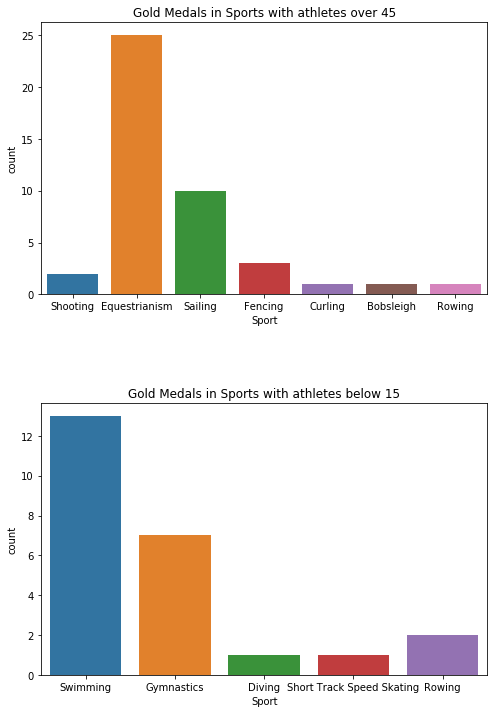

In [130]:
# visualisation 
plt.rcParams["figure.figsize"] = [8,12]
plt.tight_layout()
hspace = 0.4
plt.subplots_adjust( hspace=hspace )

plt.subplot(211)
sns.countplot(goldies)
plt.title("Gold Medals in Sports with athletes over 45")

plt.subplot(212)
sns.countplot(newbies)
plt.title("Gold Medals in Sports with athletes below 15")

plt.show()

From the above visualisations, we can clearly see that people above age 45 scored gold in sports like sailing,shooting and even horse riding, where as for athletes below 15 , swimming and gymnastics are very popular. The sports are very contrasting in nature as swimming is about dynamics and gymnastics is all about flexibility.

### Question 7: Which city hosted the Olympics the most?


In [45]:
# we have to go back to the original dataframe

df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [46]:
host = df['City'].value_counts().reset_index(name = 'Host_count').head()
host

,index,Host_count
0,London,22426
1,Athina,15556
2,Sydney,13821
3,Atlanta,13780
4,Rio de Janeiro,13688


<Figure size 720x720 with 0 Axes>

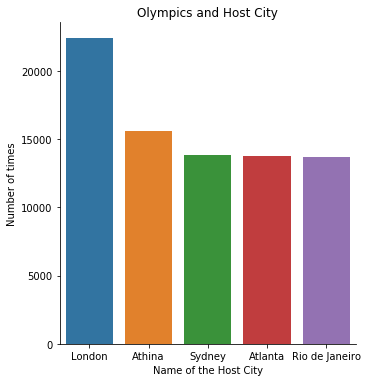

In [47]:
# lets visualise it 

plt.figure(figsize = (10,10))
sns.catplot(x ='index', y = 'Host_count', data = host, kind = 'bar')
plt.title("Olympics and Host City")
plt.xlabel("Name of the Host City")
plt.ylabel("Number of times")

plt.show()

London is clearly a winner in terms of how many times Olympics were hosted with Athina on second , and, on the other hand , Sydney,Atlanta and Rio de Janeiro were very close.

### Question 8: Sports with highest number of gold medals? Is there any specific sport that tops the chart? How about the sports with group players?

In [48]:
gold_df.Sport.value_counts()

Athletics                    1292
Swimming                      912
Rowing                        720
Ice Hockey                    442
Hockey                        395
Gymnastics                    391
Fencing                       375
Football                      364
Basketball                    361
Canoeing                      352
Volleyball                    316
Wrestling                     313
Handball                      286
Cycling                       285
Water Polo                    269
Cross Country Skiing          230
Sailing                       226
Equestrianism                 218
Boxing                        189
Weightlifting                 182
Shooting                      181
Speed Skating                 166
Judo                          129
Biathlon                      127
Alpine Skiing                 121
Baseball                      111
Diving                        106
Bobsleigh                      91
Short Track Speed Skating      90
Figure Skating

As we can see, maximum number of Gold medals were won in athletics and only once in Golf, which makes sense as this data is only till Rio Olympics 2016, and from 1900 to 2016, Golf was only in Olympics in 1900 and 1904 games. 

### Question 9: What about participation of Women in Olympics?

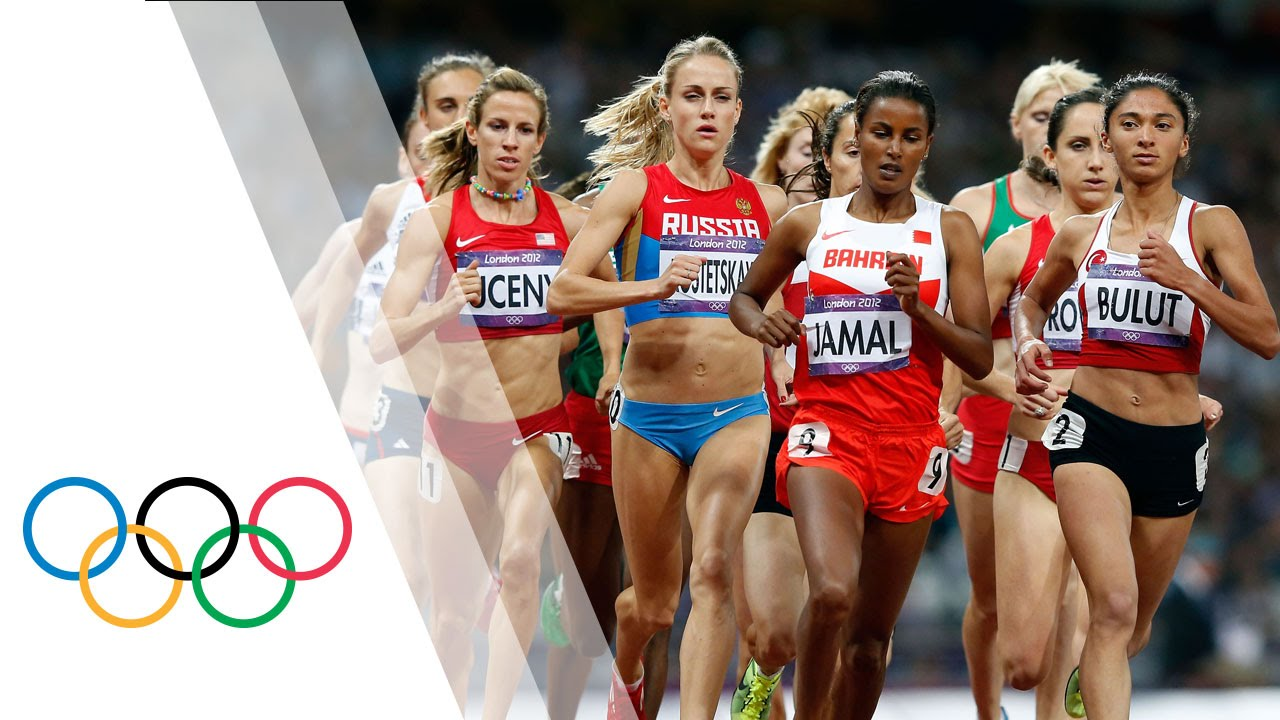

In [66]:
# lets filter out the dataset that only contains women


women = df[df.Sex == 'F']
women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Text(0.5, 1.0, 'Women Participation in Olympics over the years ')

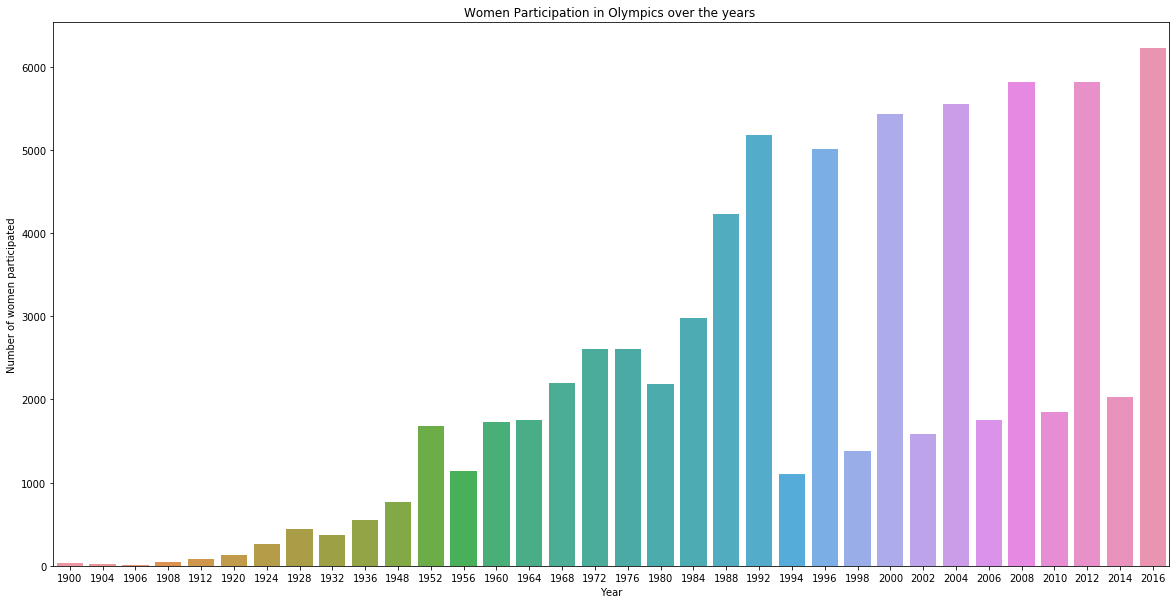

In [69]:
# lets visualise the participation of women in Olympics over the years 

plt.figure(figsize =(20,10))
plt.tight_layout()

sns.countplot( x ='Year', data = women)
plt.xlabel( "Year" )
plt.ylabel("Number of women participated")
plt.title("Women Participation in Olympics over the years ")

looking at this visualisation reminds me that it represents the women participation in both Summer and Winter olympics, hence the dips in between, lets try to visualise the summer and winter games seperately.

Text(0.5, 1.0, 'Women Participation in Olympics over the years ')

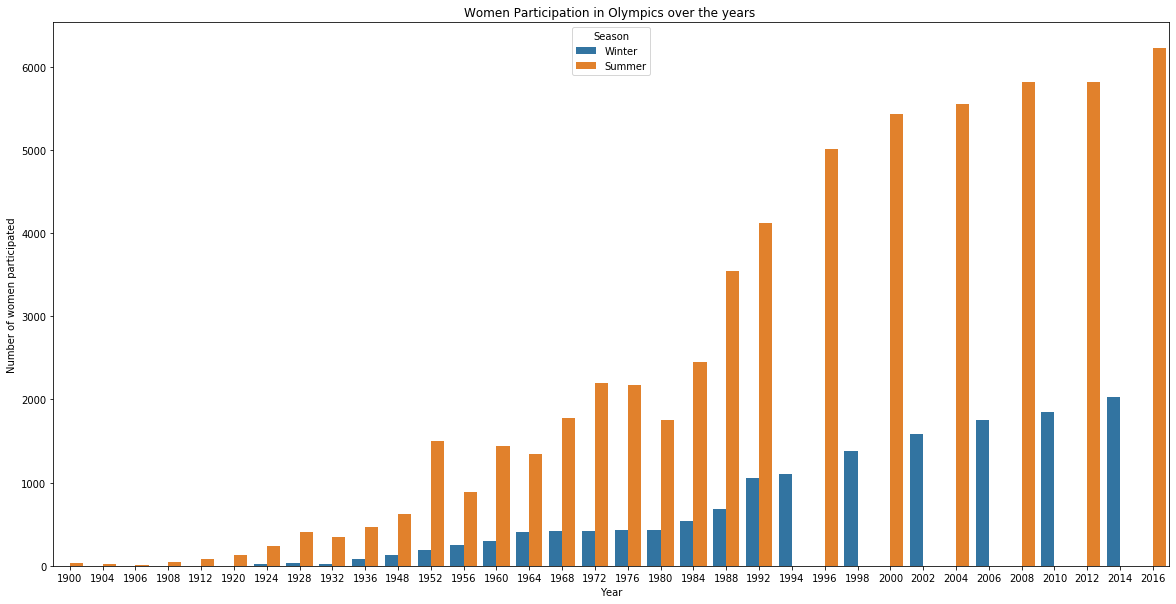

In [70]:
# lets visualise the participation of women in Olympics over the years 

plt.figure(figsize =(20,10))
plt.tight_layout()

sns.countplot( x ='Year', data = women, hue = "Season")
plt.xlabel( "Year" )
plt.ylabel("Number of women participated")
plt.title("Women Participation in Olympics over the years ")

This would be the correct representation, as we can clearly make out from the visualisation that the participation of women in games has increased over the years.Though if we compare the numbers, it is always high in Summer compared to Winter.

Text(0.5, 1.0, 'Comparison of Men and Women Participation in Olympics over the years ')

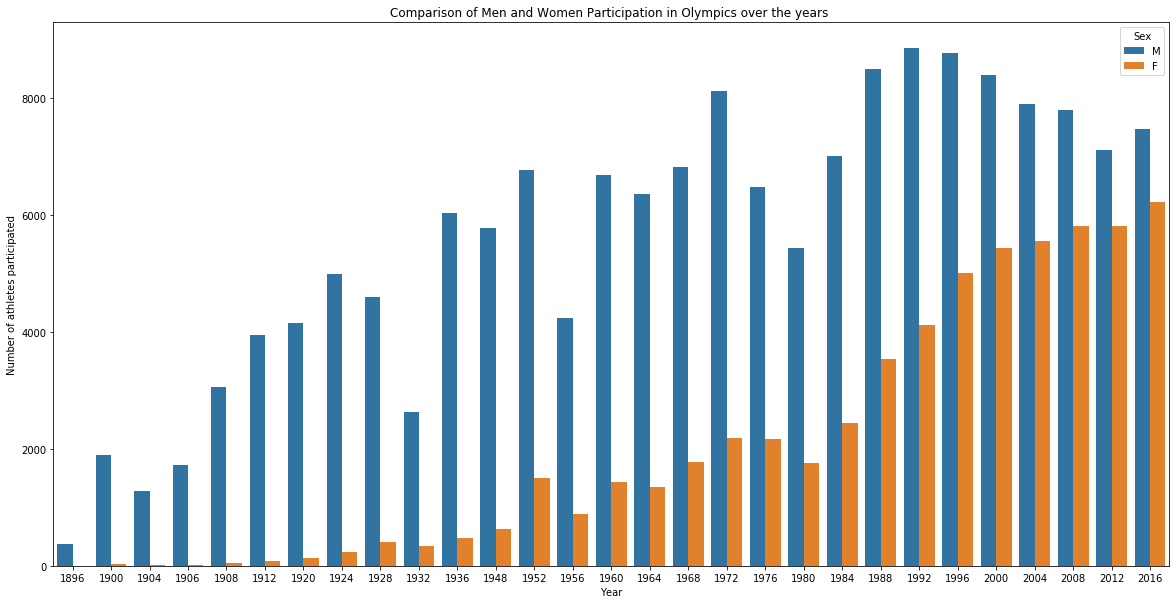

In [80]:
# lets try to visualise the comparison between men and women in terms of participation

# lets visualise the participation of women in Olympics over the years 

plt.figure(figsize =(20,10))
plt.tight_layout()

sns.countplot( x ='Year', data = df[df.Season == "Summer"], hue = "Sex")
plt.xlabel("Year" )
plt.ylabel("Number of athletes participated")
plt.title("Comparison of Men and Women Participation in Summer Olympics over the years ")

In [110]:
comparison = df.groupby(["Year", "Sex","Season"]).count()
comparison 

ID  Name   Age  Height  Weight  Team   NOC  Games  City  \
Year Sex Season                                                              
1896 M   Summer   380   380   217      46      49   380   380    380   380   
1900 F   Summer    33    33    24       0       0    33    33     33    33   
     M   Summer  1903  1903  1122     116      79  1903  1903   1903  1903   
1904 F   Summer    16    16    13       0       0    16    16     16    16   
     M   Summer  1285  1285  1014     213     147  1285  1285   1285  1285   
...               ...   ...   ...     ...     ...   ...   ...    ...   ...   
2012 M   Summer  7105  7105  7105    6997    6893  7105  7105   7105  7105   
2014 F   Winter  2023  2023  2023    2017    1920  2023  2023   2023  2023   
     M   Winter  2868  2868  2868    2854    2753  2868  2868   2868  2868   
2016 F   Summer  6223  6223  6223    6156    6131  6223  6223   6223  6223   
     M   Summer  7465  7465  7465    7356    7334  7465  7465   7465  7465   

                 Sport  Event  Medal  region  notes  
Year Sex Season                                      
1896 M   Summer    380    380    143     380      0  
1900 F   Summer     33     33     13      33      2  
     M   Summer   1903   1903    591    1903      7  
1904 F   Summer     16     16     10      16      0  
     M   Summer   1285   1285    476    1285      1  
...                ...    ...    ...     ...    ...  
2012 M   Summer   7105   7105   1023    7091     70  
2014 F   Winter   2023   2023    265    2023      2  
     M   Winter   2868   2868    332    2868      2  
2016 F   Summer   6223   6223    969    6198     59  
     M   Summer   7465   7465   1054    7445     78  

[101 rows x 14 columns]

### Question 10: Which Sport is most popular in Olympics and which one is least popular?

In [143]:
df["Sport"].value_counts()

Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64

Looks like Athletics is most popular and Aeronautics is least popular , only played once.

Lets see the distribution of the dataset after dropping the missing values 

### Distribution of Gold Medals among the Age of Athletes 

Text(0.5, 1.0, 'Distribution of Gold Medals with Age of the Athletes ')

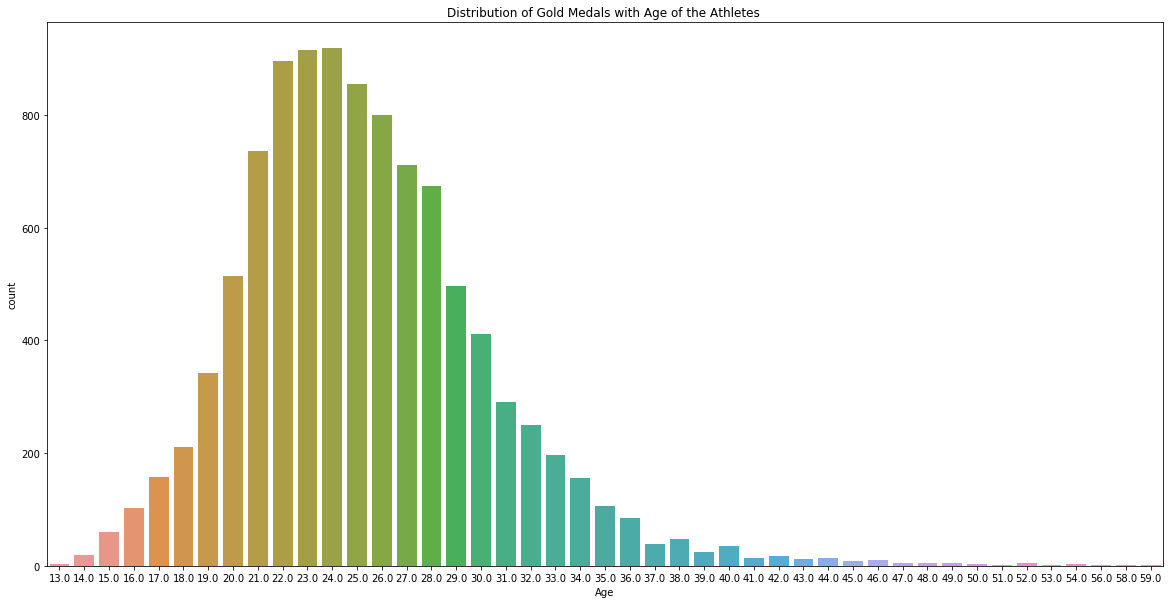

In [49]:
# using matplotlib and seaborn to make a distribution plot 


#displaying the figure size
plt.figure(figsize=(20, 10))
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.tight_layout()
# using countplot in seaborn to make the plot
sns.countplot(x = 'Age', data = gold_df)
# displaying the title of the figure 
plt.title('Distribution of Gold Medals with Age of the Athletes ')


From the plot we can see that most of the athletes that won the gold medals have the age window of 20-30 and 24 is the peak age at which most of the athletes have won the gold medals.

### Distribution of Gold Medals among the Height of Athletes 

Text(0.5, 1.0, 'Distribution of Gold Medals with Height of the Athletes ')

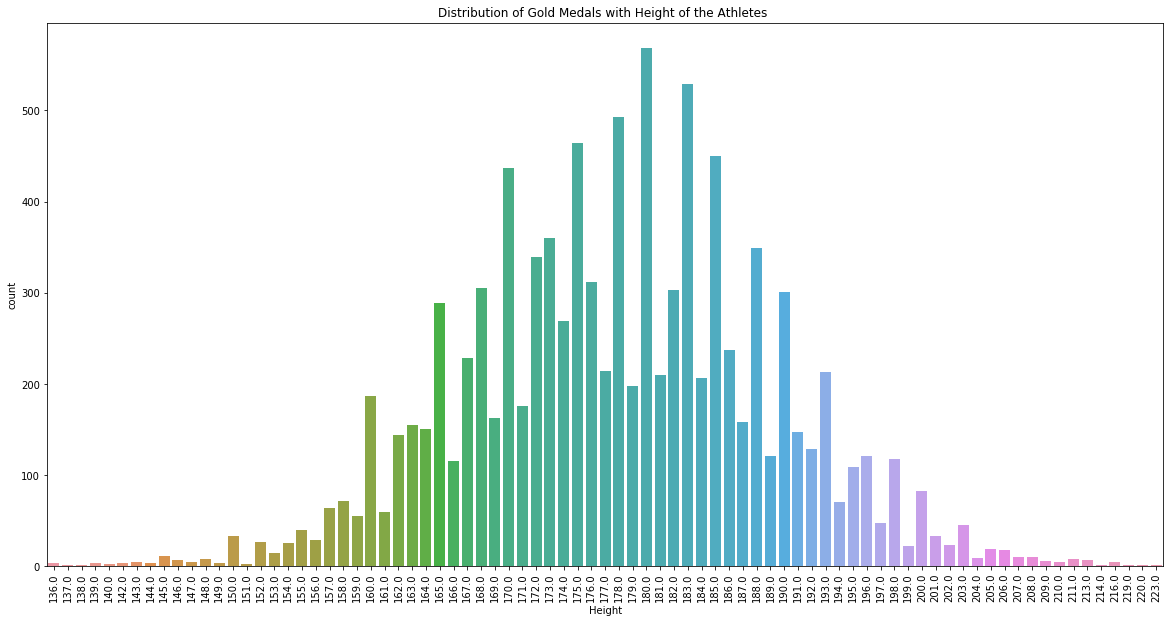

In [50]:
# using matplotlib and seaborn to make a distribution plot 


#displaying the figure size
plt.figure(figsize=(20, 10))
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.tight_layout()
# using countplot in seaborn to make the plot
sns.countplot(x = 'Height', data = gold_df)
# to rotate the x labels on x axis for more visibility  
plt.xticks(rotation = 90)
# displaying the title of the figure 
plt.title('Distribution of Gold Medals with Height of the Athletes ')


looking at the distribution plot, There seems to be a pattern of a wave, looks like optimal height to win a gold medal is 170 to 190 cms, however there are few spikes at certain heights.

### Distribution of Gold Medals with the Weight of the Athletes 



Text(0.5, 1.0, 'Distribution of Gold Medals with Weight of the Athletes ')

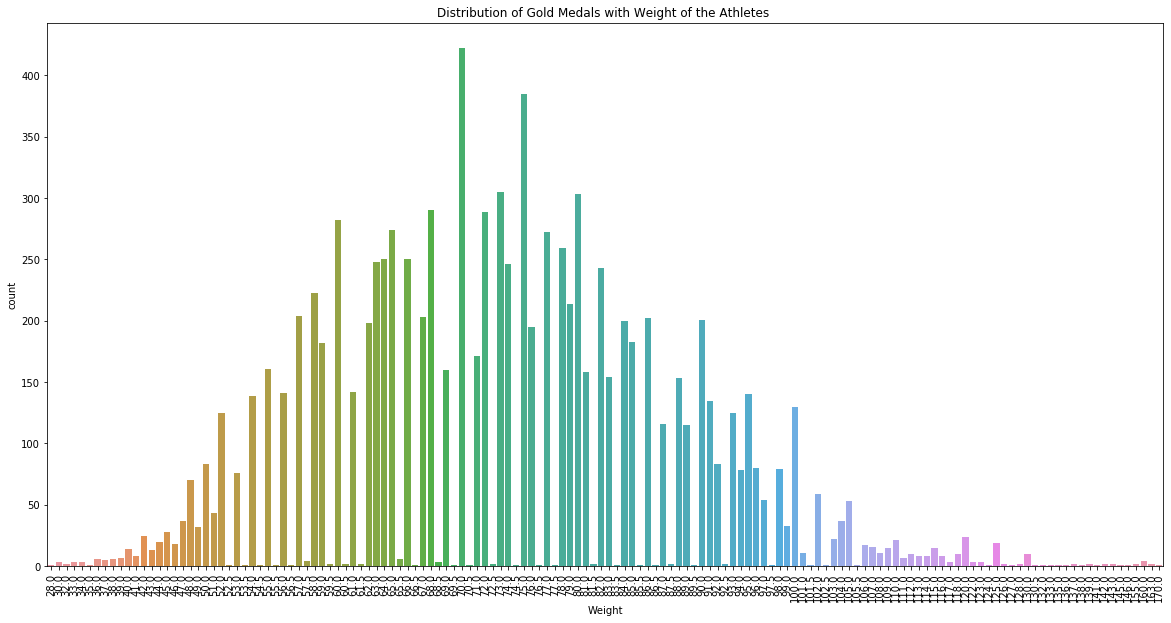

In [51]:
# using matplotlib and seaborn to make a distribution plot 


#displaying the figure size
plt.figure(figsize=(20, 10))
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.tight_layout()
# using countplot in seaborn to make the plot
sns.countplot(x = 'Weight', data = gold_df)
# to rotate the x labels on x axis for more visibility  
plt.xticks(rotation = 90)
# displaying the title of the figure 
plt.title('Distribution of Gold Medals with Weight of the Athletes ')


from the above visualisation, we can see that the weight of the most of the athletes that won gold medal ranges between 60 to 80 kgs and there is a huge spike at 70. However, this would be too early to generalise as this data is about athletes that won medals in different sports.


Lets check the unique values in each column 

In [52]:
# saving all the column names in col variable
col = gold_df.columns 

for col in gold_df:
    print("Unique values in column")
    print(col)
    print(gold_df[col].unique())
    print(" \\\ ")

Unique values in column
ID
[    17     20     72 ... 135523 135545 135553]
 \\ 
Unique values in column
Name
['Paavo Johannes Aaltonen' 'Kjetil Andr Aamodt'
 'Aleksey Aleksandrovich Abalmasov' ... 'Ronald Ferdinand "Ron" Zwerver'
 'Henk Jan Zwolle' 'Galina Ivanovna Zybina (-Fyodorova)']
 \\ 
Unique values in column
Sex
['M' 'F']
 \\ 
Unique values in column
Age
[28. 20. 30. 34. 23. 27. 22. 38. 29. 26. 25. 19. 21. 24. 33. 16. 18. 31.
 35. 49. 40. 39. 32. 41. 17. 54. 15. 36. 37. 42. 52. 56. 43. 14. 44. 46.
 50. 47. 13. 45. 48. 59. 53. 58. 51.]
 \\ 
Unique values in column
Height
[175. 176. 180. 182. 185. 186. 181. 190. 188. 187. 169. 160. 167. 202.
 166. 172. 192. 183. 168. 178. 170. 194. 179. 164. 193. 189. 198. 148.
 162. 171. 173. 150. 195. 154. 177. 184. 163. 174. 165. 200. 203. 158.
 155. 191. 199. 161. 152. 159. 207. 139. 201. 211. 157. 196. 197. 214.
 143. 205. 206. 208. 216. 156. 153. 209. 213. 210. 144. 140. 204. 149.
 136. 138. 142. 145. 147. 219. 151. 146. 220. 223. 137.]
 \\ 

Lets specifically focus on just one sport and check the same. 


### 100 m - Men and Women 

Lets find out the full name of event 100m 

In [53]:
# lets see the list of events alphabeticallly 
print(gold_df[["Event"]].sort_values("Event"))

                                            Event
138927               Alpine Skiing Men's Combined
198803               Alpine Skiing Men's Combined
120535               Alpine Skiing Men's Combined
230778               Alpine Skiing Men's Combined
252745               Alpine Skiing Men's Combined
...                                           ...
266102   Wrestling Women's Lightweight, Freestyle
102016  Wrestling Women's Middleweight, Freestyle
114840  Wrestling Women's Middleweight, Freestyle
102014  Wrestling Women's Middleweight, Freestyle
102015  Wrestling Women's Middleweight, Freestyle

[10167 rows x 1 columns]


Above code is of not much use. Lets see the events that start with alphabet A.

In [54]:
gold_df[gold_df['Event'].str.startswith('A')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NaN
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
620,359,Andrey Khakimovich Abduvaliyev,M,26.0,190.0,125.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270179,135164,Robert Zmlk,M,23.0,186.0,88.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Decathlon,Gold,Czech Republic,NaN
270552,135313,Gyula Zsivtzky,M,31.0,190.0,102.0,Hungary,HUN,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's Hammer Throw,Gold,Hungary,NaN
270876,135465,Pirmin Zurbriggen,M,25.0,183.0,83.0,Switzerland,SUI,1988 Winter,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold,Switzerland,NaN
270970,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,Belarus,NaN


In [55]:
gold_df.loc[gold_df['Event'] == "100"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes


One more try. Because i have to 

#### filtering Mens 100 metres 

creating a new dataframe `mens_100` to save the data that belong to men's 100 meters only

In [56]:
# using substring option 
mens_100 = gold_df[gold_df['Event'].str.contains("Athletics Men's 100 metres")]
mens_100.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,UK,NaN
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold,Canada,NaN
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN
24883,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN


In [57]:
mens_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 915 to 261082
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29 non-null     int64  
 1   Name    29 non-null     object 
 2   Sex     29 non-null     object 
 3   Age     29 non-null     float64
 4   Height  29 non-null     float64
 5   Weight  29 non-null     float64
 6   Team    29 non-null     object 
 7   NOC     29 non-null     object 
 8   Games   29 non-null     object 
 9   Year    29 non-null     int64  
 10  Season  29 non-null     object 
 11  City    29 non-null     object 
 12  Sport   29 non-null     object 
 13  Event   29 non-null     object 
 14  Medal   29 non-null     object 
 15  region  29 non-null     object 
 16  notes   1 non-null      object 
dtypes: float64(3), int64(2), object(12)
memory usage: 4.1+ KB


In [58]:
mens_100['Name'].unique()

array(['Harold Maurice Abrahams', 'Donovan Bailey', 'Usain St. Leo Bolt',
       'Valeriy Pylypovych Borzov', 'Thomas Edmund "Tom" Burke',
       'Linford Ecerio Christie', 'Ralph Cook Craig',
       'Hasely Joachim Crawford', 'William Harrison Dillard',
       'Justin Alexander Gatlin', 'Maurice Greene',
       'Charles Archibald "Archie" Hahn', 'Armin Hary',
       'Robert Lee "Bob" Hayes', 'James Ray "Jim" Hines',
       'Frank Washington Jarvis', 'Frederick Carlton "Carl" Lewis',
       'Bobby Joe Morrow', 'James Cleveland "Jesse" Owens',
       'Charles William "Charley" Paddock', 'Lindy John Remigino',
       'Thomas Edward "Eddie" Tolan, Jr.',
       'Reginald Edgar "Reggie" Walker', 'Allan Wipper Wells',
       'Percy Alfred Williams'], dtype=object)

Lets see the distribution of the age, height and weight of athletes that won gold in Men's 100 metres 

Text(0, 0.5, 'Count of Athletes')

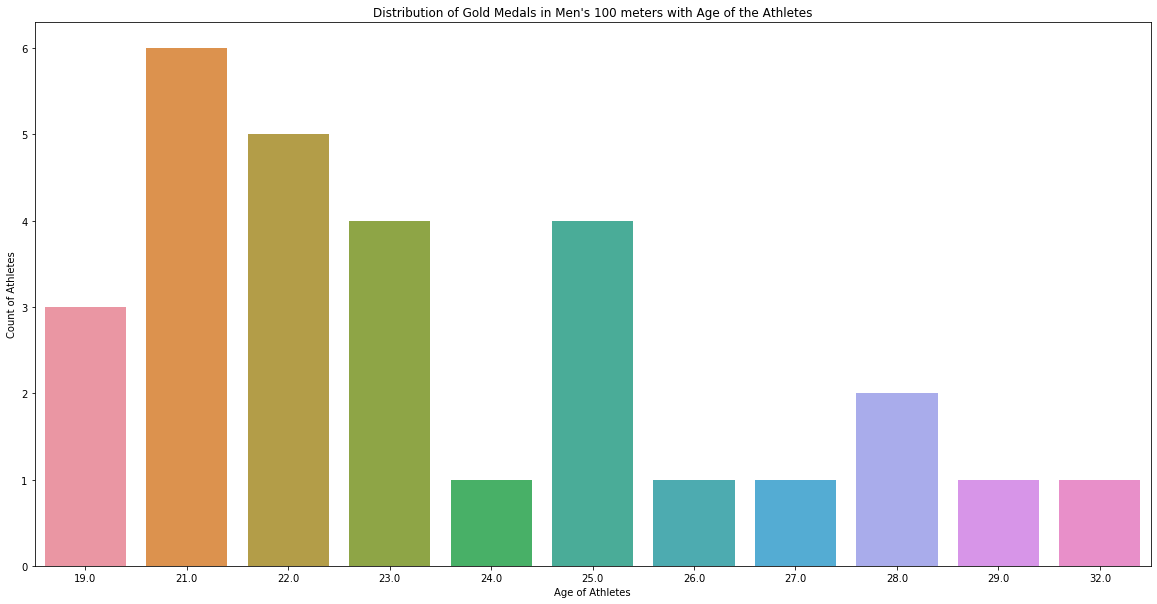

In [59]:
# using matplotlib and seaborn to make a distribution plot 


#displaying the figure size
plt.figure(figsize=(20, 10))
# tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.tight_layout()
# using countplot in seaborn to make the plot
sns.countplot(x = 'Age', data = mens_100)
# displaying the title of the figure 
plt.title("Distribution of Gold Medals in Men's 100 meters with Age of the Athletes")
plt.xlabel("Age of Athletes")
plt.ylabel("Count of Athletes")

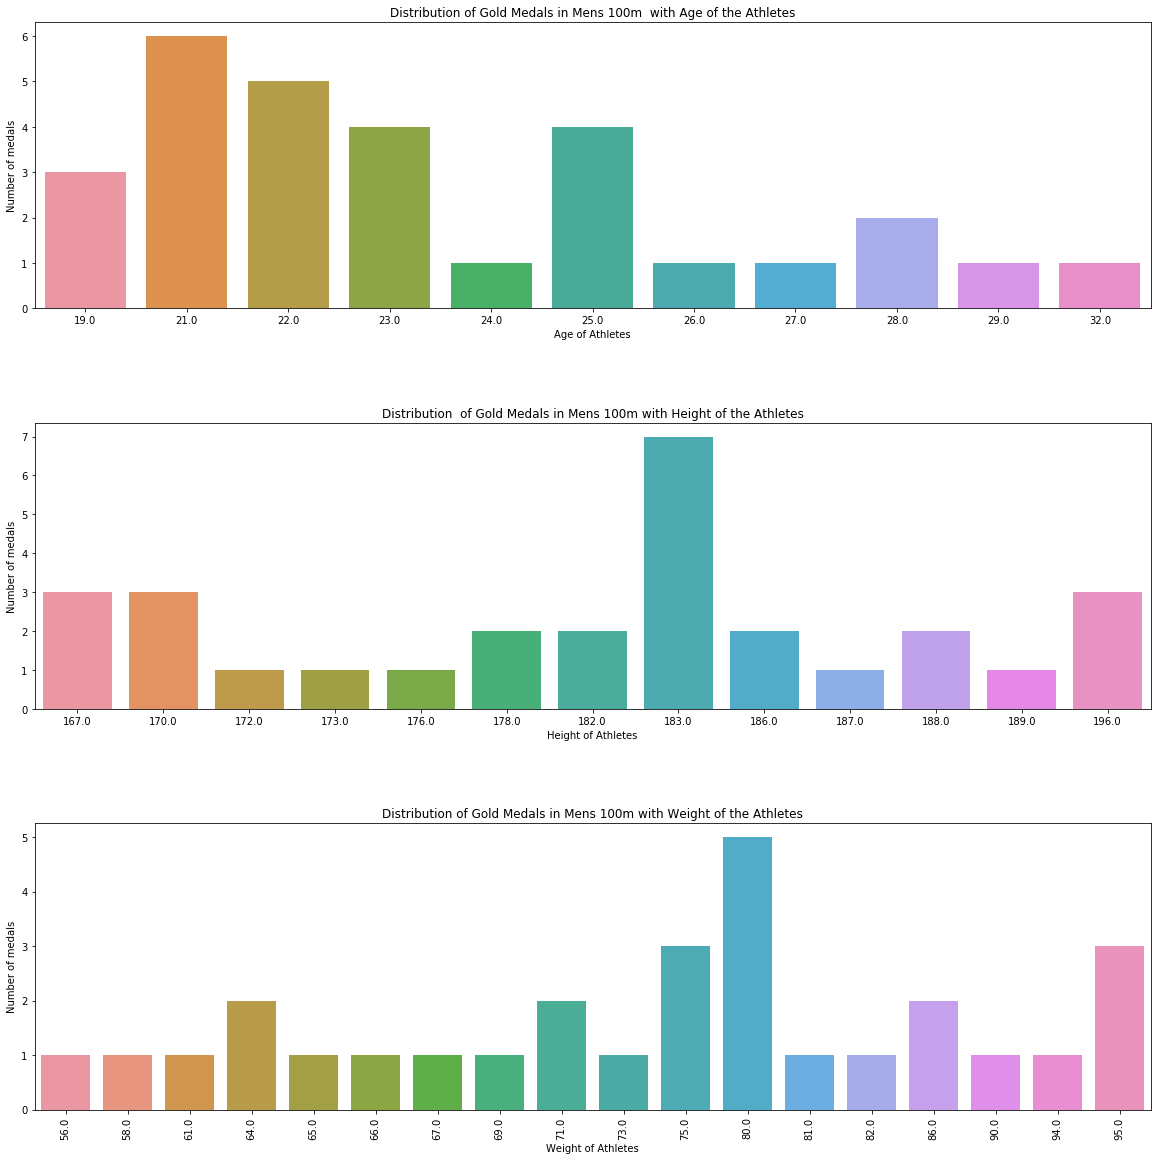

In [60]:
# using matplotlib and seaborn to make a distribution plot 

#displaying the figure size

plt.rcParams["figure.figsize"] = [20,20]
#fig.tight_layout()
hspace = 0.4
plt.subplots_adjust( hspace=hspace )

plt.subplot(311)

sns.countplot(x = 'Age', data = mens_100)
plt.title("Distribution of Gold Medals in Mens 100m  with Age of the Athletes")
plt.xlabel("Age of Athletes")
plt.ylabel("Number of medals")


plt.subplot(312)

sns.countplot(x = 'Height', data = mens_100)
plt.title("Distribution  of Gold Medals in Mens 100m with Height of the Athletes")
plt.xlabel("Height of Athletes")
plt.ylabel("Number of medals")

plt.subplot(313)

sns.countplot(x = 'Weight', data = mens_100)
plt.title("Distribution of Gold Medals in Mens 100m with Weight of the Athletes")
plt.xlabel("Weight of Athletes")
plt.ylabel("Number of medals")
plt.xticks(rotation = 90)


plt.show()


### QUESTION 11: Which athlete won the most gold medals in men's 100 meters? Which country won the most number of gold medals in men's 100 metres?



In [61]:
mens_100.head(29)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
915,519,Harold Maurice Abrahams,M,24.0,183.0,75.0,Great Britain,GBR,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,UK,NaN
12653,6890,Donovan Bailey,M,28.0,183.0,82.0,Canada,CAN,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 100 metres,Gold,Canada,NaN
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN
24880,13029,Usain St. Leo Bolt,M,25.0,196.0,95.0,Jamaica,JAM,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN
24883,13029,Usain St. Leo Bolt,M,29.0,196.0,95.0,Jamaica,JAM,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 100 metres,Gold,Jamaica,NaN
26261,13691,Valeriy Pylypovych Borzov,M,22.0,183.0,80.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,Gold,Russia,NaN
32333,16616,"Thomas Edmund ""Tom"" Burke",M,21.0,183.0,66.0,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold,USA,NaN
41329,21313,Linford Ecerio Christie,M,32.0,189.0,94.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 100 metres,Gold,UK,NaN
45842,23661,Ralph Cook Craig,M,22.0,182.0,73.0,United States,USA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's 100 metres,Gold,USA,NaN
45942,23711,Hasely Joachim Crawford,M,25.0,187.0,90.0,Trinidad and Tobago,TTO,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's 100 metres,Gold,Trinidad,Trinidad and Tobago


In [62]:
mens_100.Name.value_counts().reset_index(name='Medal Count').head(5)

,index,Medal Count
0,Usain St. Leo Bolt,3
1,"Charles Archibald ""Archie"" Hahn",2
2,"Frederick Carlton ""Carl"" Lewis",2
3,Linford Ecerio Christie,1
4,Hasely Joachim Crawford,1


The answer is Usain Bolt. He won 3 medals in men's 100 metres. 

In [174]:
mens_100.Team.value_counts()

United States          17
Jamaica                 3
Great Britain           3
Canada                  2
Germany                 1
South Africa            1
Soviet Union            1
Trinidad and Tobago     1
Name: Team, dtype: int64

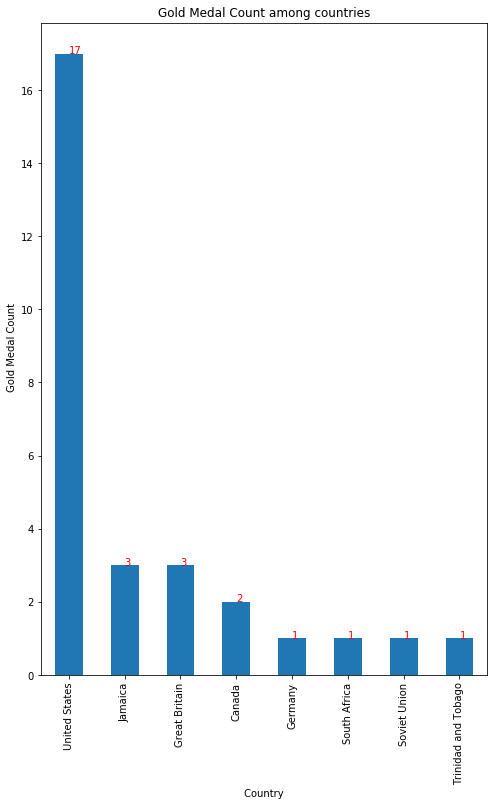

In [180]:
# lets visualise the above results 
mens_100.Team.value_counts().plot(kind = 'bar')
plt.xlabel(" Country ")
plt.ylabel(" Gold Medal Count")
plt.title("Gold Medal Count among countries")
a = mens_100.Team.value_counts().values
for index, value in enumerate(a):
    plt.text(index, value, str(value),color='red',size=10)

Clearly, USA sweeps the charts with 17 medals and no other country is close to it. 

In [182]:
gold_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


# Womens 100 m


In [63]:
women_100 = gold_df[gold_df["Event"].str.contains("Athletics Women's 100 metres")]

In [64]:
women_100.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10141,5547,Evelyn Ashford (-Washington),F,27.0,165.0,52.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,Gold,USA,NaN
23132,12166,"Francina Elsje ""Fanny"" Blankers-Koen",F,30.0,175.0,63.0,Netherlands,NED,1948 Summer,1948,Summer,London,Athletics,Athletics Women's 100 metres,Gold,Netherlands,NaN
47428,24448,"Elizabeth Alyse ""Betty"" Cuthbert",F,18.0,169.0,57.0,Australia,AUS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's 100 metres,Gold,Australia,NaN
54470,27940,Yolanda Gail L. Devers (-Roberts),F,25.0,160.0,55.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 100 metres,Gold,USA,NaN
54472,27940,Yolanda Gail L. Devers (-Roberts),F,29.0,160.0,55.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 100 metres,Gold,USA,NaN


In [213]:
# top 5 women to won most gold medals in Women's 100m
women_100.Name.value_counts().reset_index(name='Medal Count').head(5)

,index,Medal Count
0,Shelly-Ann Fraser-Pryce,2
1,Yolanda Gail L. Devers (-Roberts),2
2,Wyomia Tyus (-Simburg),2
3,Johanna Schaller-Klier,1
4,"Elizabeth Alyse ""Betty"" Cuthbert",1


In [214]:
# top countries 
women_100.Team.value_counts()

United States    13
Jamaica           3
East Germany      3
Australia         3
Soviet Union      2
West Germany      1
Greece            1
Poland            1
Netherlands       1
Kazakhstan        1
Belarus           1
Sweden            1
Bulgaria          1
Name: Team, dtype: int64